In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Loading the dataset

In [2]:
df= pd.read_csv("2018.csv")

In [3]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
low_memory=False

###### Statistical Parameters of the Dataset

In [17]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7.213446e+06,7.213446e+06,7.101129e+06,7.096212e+06,7.097616e+06,7.097617e+06,7.094200e+06,7.094200e+06,7.213446e+06,7.094201e+06,...,7.213436e+06,7.079004e+06,7.079004e+06,7.213446e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,0.0
mean,2.607531e+03,1.329687e+03,1.333854e+03,9.969858e+00,1.741061e+01,1.357799e+03,1.462162e+03,7.601246e+00,1.486341e+03,1.466784e+03,...,1.411356e+02,1.364999e+02,1.115020e+02,7.999895e+02,1.945501e+01,3.636459e+00,1.588547e+01,9.353890e-02,2.564412e+01,NaN
std,1.860122e+03,4.909320e+02,5.045055e+02,4.482964e+01,9.920409e+00,5.059721e+02,5.334675e+02,6.064797e+00,5.183124e+02,5.377089e+02,...,7.334433e+01,7.313758e+01,7.111293e+01,5.981783e+02,5.890812e+01,2.999601e+01,3.589350e+01,3.174306e+00,4.978776e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.029000e+03,9.150000e+02,9.160000e+02,-5.000000e+00,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.100000e+03,1.049000e+03,...,8.800000e+01,8.300000e+01,6.000000e+01,3.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,2.131000e+03,1.320000e+03,1.326000e+03,-2.000000e+00,1.500000e+01,1.340000e+03,1.502000e+03,6.000000e+00,1.515000e+03,1.506000e+03,...,1.220000e+02,1.180000e+02,9.200000e+01,6.320000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,4.074000e+03,1.735000e+03,1.744000e+03,7.000000e+00,2.000000e+01,1.759000e+03,1.911000e+03,9.000000e+00,1.919000e+03,1.916000e+03,...,1.710000e+02,1.670000e+02,1.410000e+02,1.034000e+03,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.100000e+01,NaN
max,7.909000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,...,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03,NaN


###### Data Type Info of the Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [19]:
df.apply(lambda x: len(x.unique()))

FL_DATE                 365
OP_CARRIER               18
OP_CARRIER_FL_NUM      7113
ORIGIN                  358
DEST                    358
CRS_DEP_TIME           1369
DEP_TIME               1441
DEP_DELAY              1489
TAXI_OUT                181
WHEELS_OFF             1441
WHEELS_ON              1441
TAXI_IN                 206
CRS_ARR_TIME           1431
ARR_TIME               1441
ARR_DELAY              1528
CANCELLED                 2
CANCELLATION_CODE         5
DIVERTED                  2
CRS_ELAPSED_TIME        583
ACTUAL_ELAPSED_TIME     707
AIR_TIME                677
DISTANCE               1555
CARRIER_DELAY          1331
WEATHER_DELAY          1038
NAS_DELAY               953
SECURITY_DELAY          215
LATE_AIRCRAFT_DELAY     979
Unnamed: 27               1
dtype: int64

In [20]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

###### Adding Flight Month and Flight Day Column

In [3]:
df['Flight_Month'] = pd.DatetimeIndex(df['FL_DATE']).month
df['Flight_Day'] = pd.DatetimeIndex(df['FL_DATE']).day

In [41]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,Flight_Month,Flight_Day
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN,12,31
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN,12,31
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN,12,31
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,12,31


In [43]:
df.shape

(7213446, 24)

###### Plotting the Bar Graph

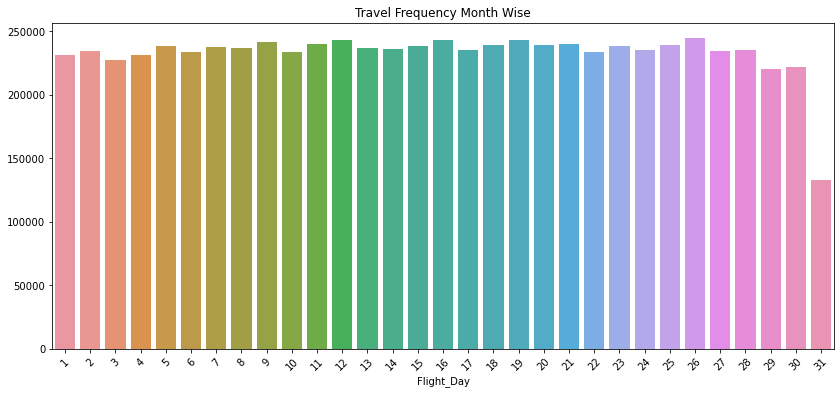

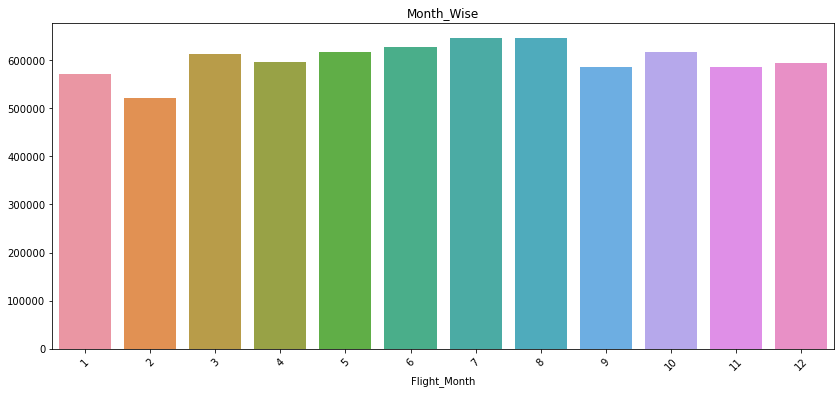

In [46]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(df.value_counts('Flight_Day'), 'Travel Frequency Month Wise')
plot_bar(df.value_counts('Flight_Month'), 'Month_Wise')

In [4]:
mean_value=df['ARR_DELAY'].mean()

In [5]:
mean_value

5.048580875659198

In [6]:
df['ARR_DELAY'].fillna(value=mean_value, inplace=True)

In [11]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Flight_Month,Flight_Day
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,1,1
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,1,1
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,1,1
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,1,1
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,-5.0,0.0,NaN,0.0,100.0,99.0,72.0,331.0,12,31
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,1.0,0.0,NaN,0.0,181.0,176.0,148.0,936.0,12,31
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,11.0,0.0,NaN,0.0,112.0,128.0,88.0,511.0,12,31
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,12,31


In [7]:
delay =[]
for row in df['ARR_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
df['ArrivalDelay'] = delay

In [13]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay
df.value_counts('ArrivalDelay')

ArrivalDelay
0    5908254
1     471849
3     440268
2     393075
dtype: int64

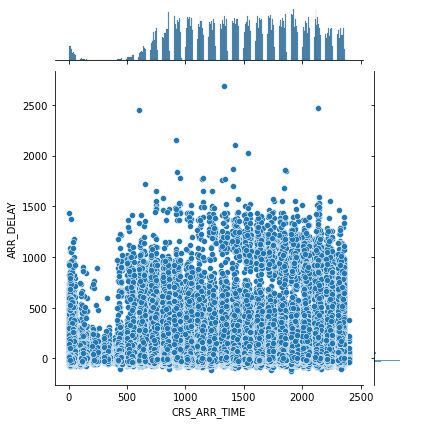

In [15]:
sns.jointplot(data=df, x="CRS_ARR_TIME", y="ARR_DELAY")

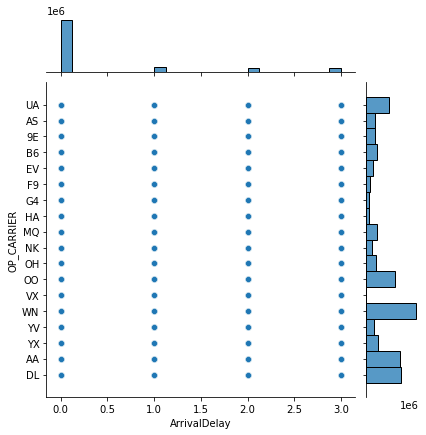

In [17]:
sns.jointplot(data=df, y="OP_CARRIER", x="ArrivalDelay")

<AxesSubplot:>

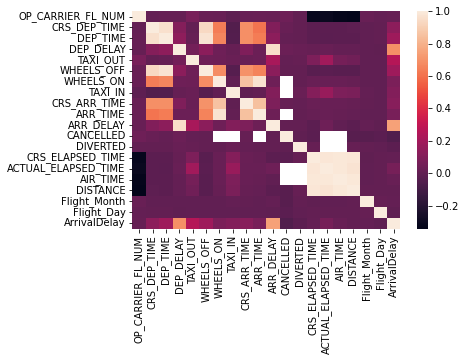

In [18]:
sns.heatmap(df.corr())

In [8]:
flights_data=df.drop(["FL_DATE",'OP_CARRIER','OP_CARRIER_FL_NUM', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON','TAXI_IN','ORIGIN','DEST',
                      'CANCELLED','CANCELLATION_CODE','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE'], axis= 1)

In [9]:
flights_data=flights_data.drop(columns= ['CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY', 'SECURITY_DELAY','LATE_AIRCRAFT_DELAY','Unnamed: 27'])

In [12]:
flights_data

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,Flight_Month,Flight_Day,ArrivalDelay
0,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,1,1,0
1,1115,1107.0,-8.0,1254,1230.0,-24.0,0.0,1,1,0
2,1335,1330.0,-5.0,1649,1636.0,-13.0,0.0,1,1,0
3,1546,1552.0,6.0,1756,1754.0,-2.0,0.0,1,1,0
4,630,650.0,20.0,922,936.0,14.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7213441,1534,1530.0,-4.0,1714,1709.0,-5.0,0.0,12,31,0
7213442,1751,1757.0,6.0,1952,1953.0,1.0,0.0,12,31,0
7213443,2015,2010.0,-5.0,2107,2118.0,11.0,0.0,12,31,0
7213444,1300,1323.0,23.0,1350,1404.0,14.0,0.0,12,31,0


In [10]:
flights_data.describe()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,Flight_Month,Flight_Day,ArrivalDelay
count,7.213446e+06,7.101129e+06,7.096212e+06,7.213446e+06,7.094201e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06
mean,1.329687e+03,1.333854e+03,9.969858e+00,1.486341e+03,1.466784e+03,5.048581e+00,2.475793e-03,6.564521e+00,1.577143e+01,3.574995e-01
std,4.909320e+02,5.045055e+02,4.482964e+01,5.183124e+02,5.377089e+02,4.647875e+01,4.969571e-02,3.395780e+00,8.765812e+00,8.395736e-01
min,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,-1.200000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,9.150000e+02,9.160000e+02,-5.000000e+00,1.100000e+03,1.049000e+03,-1.400000e+01,0.000000e+00,4.000000e+00,8.000000e+00,0.000000e+00
50%,1.320000e+03,1.326000e+03,-2.000000e+00,1.515000e+03,1.506000e+03,-5.000000e+00,0.000000e+00,7.000000e+00,1.600000e+01,0.000000e+00
75%,1.735000e+03,1.744000e+03,7.000000e+00,1.919000e+03,1.916000e+03,7.000000e+00,0.000000e+00,9.000000e+00,2.300000e+01,0.000000e+00
max,2.359000e+03,2.400000e+03,2.710000e+03,2.400000e+03,2.400000e+03,2.692000e+03,1.000000e+00,1.200000e+01,3.100000e+01,3.000000e+00


In [10]:
flights_data=flights_data.fillna(flights_data.mean())

<AxesSubplot:>

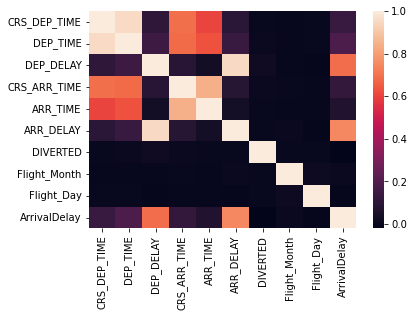

In [12]:
sns.heatmap(flights_data.corr())

###### Splitting the Dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=flights_data.drop(columns=['ArrivalDelay'], axis=1)
Y=flights_data['ArrivalDelay']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [21]:
X

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,Flight_Month,Flight_Day
0,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,1,1
1,1115,1107.0,-8.0,1254,1230.0,-24.0,0.0,1,1
2,1335,1330.0,-5.0,1649,1636.0,-13.0,0.0,1,1
3,1546,1552.0,6.0,1756,1754.0,-2.0,0.0,1,1
4,630,650.0,20.0,922,936.0,14.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...
7213441,1534,1530.0,-4.0,1714,1709.0,-5.0,0.0,12,31
7213442,1751,1757.0,6.0,1952,1953.0,1.0,0.0,12,31
7213443,2015,2010.0,-5.0,2107,2118.0,11.0,0.0,12,31
7213444,1300,1323.0,23.0,1350,1404.0,14.0,0.0,12,31


###### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100,min_samples_leaf= 1,max_depth = 30, criterion="entropy",bootstrap = False)  
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30)

In [43]:
y_pred= classifier.predict(X_test)  

In [44]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  confu_mat

In [45]:
cm

array([[1771898,       0,       0,       0],
       [      0,  141961,       0,       0],
       [      0,       0,  118206,       0],
       [      0,       0,       0,  131969]], dtype=int64)

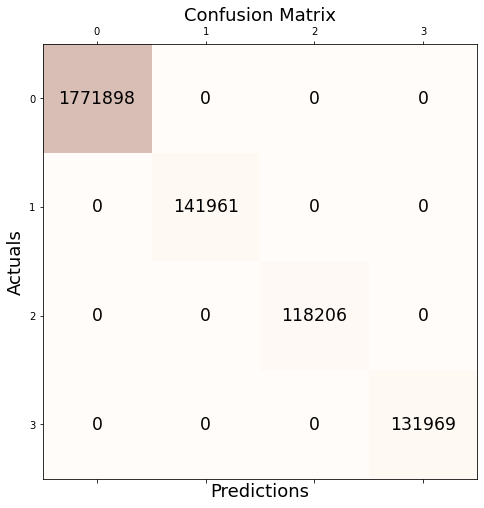

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.matshow(cm, cmap=plt.cm.viridis, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [57]:
print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

Precision: 1.000
Recall: 1.000
F1 Score: 1.000


###### Navie Bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred_gau = gnb.predict(X_test)

In [16]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gau)*100)

Gaussian Naive Bayes model accuracy(in %): 96.83299800280403


In [18]:
from sklearn.metrics import confusion_matrix 
cm= confusion_matrix(y_test, y_pred_gau)  

In [19]:
cm

array([[1732438,   35290,       0,    4170],
       [   8698,  128883,    4369,      11],
       [     68,    4260,  113617,     261],
       [      0,       0,   11408,  120561]], dtype=int64)

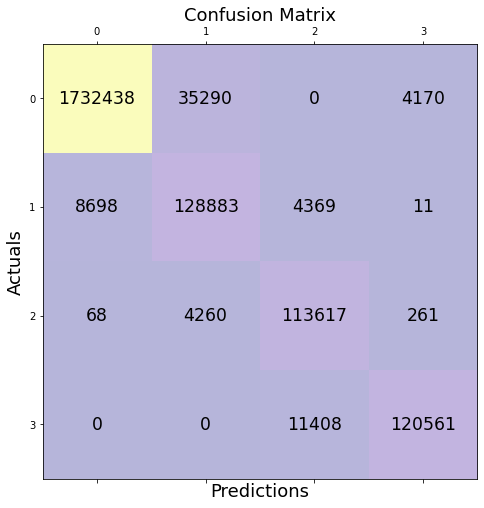

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.matshow(cm, cmap=plt.cm.plasma, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [63]:
print('Precision: %.3f' % precision_score(y_test,y_pred_gau,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred_gau,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_gau,average='micro'))

Precision: 0.968
Recall: 0.968
F1 Score: 0.968


###### Support Vector Machine Classifier

In [47]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 

In [ ]:
clf.fit(X_train, y_train)

In [45]:
prediction = model.predict(X_test)

In [ ]:
con_mat= confusion_matrix(y_test, prediction)  

In [ ]:
con_mat

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.matshow(con_mat, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, prediction))
print('Recall: %.3f' % recall_score(y_test,prediction))
print('Accuracy: %.3f' % accuracy_score(y_test,prediction))
print('F1 Score: %.3f' % f1_score(y_test, prediction))

Precision: 0.878                                                                                                               
Recall: 0.878                                                                                                                
F1 Score: 0.878                                                                                                                 

###### Logistic Regression

In [15]:
from sklearn import linear_model

In [16]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

F:\software\Ananconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred = logr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix  
confu_mat= confusion_matrix(y_test, pred)  

In [31]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, pred)
accuracy*100 

92.36268931079641

In [20]:
confu_mat

array([[1741885,   25540,    3514,     959],
       [  41396,   77444,   21475,    1646],
       [    964,   33591,   64523,   19128],
       [      0,     915,   16146,  114908]], dtype=int64)

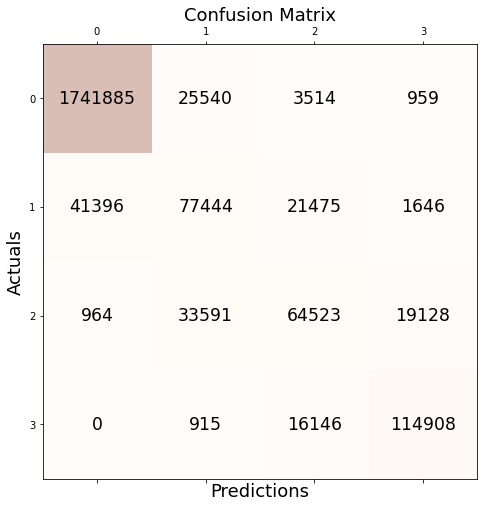

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.matshow(confu_mat, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confu_mat.shape[0]):
    for j in range(confu_mat.shape[1]):
        ax.text(x=j, y=i,s=confu_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
print('Precision: %.3f' % precision_score(y_test,pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, pred,average='micro'))

Precision: 0.924
Recall: 0.924
F1 Score: 0.924
